# <span style="color:orange"> Laboratorio di Simulazione Numerica </span>
## <span style="color:orange"> Esercitazione 11 </span>

### Paolo Panatti (12606A)

In questa esercitazione vogliamo addestrare **reti neurali artificiali** per svolgere problemi di **regressione su dati rumorosi**. In particolare, ci interessa esplorare come la capacità di approssimare una funzione qualsiasi dipenda dalla struttura della rete.

Il dataset comprende coppie di valori $(x,y)$ generate tramite l'equazione:
$$y_i = f(x_i) + \eta_i$$
dove $f(x_i)$ è una funzione fissata (possibilmente non nota), mentre $\eta_i$ una variabile gaussiana scorrelata con valor medio nullo e deviazione standard $\sigma$.

L'obiettivo è quello di risalire alla funzione $f(x)$ sottostante eseguendo un fit dei dati e, per fare ciò, utilizziamo una rete neurale, che dipende da una serie di parametri (pesi e bias). Questi parametri vengono ottimizzati allenando il modello sul set di dati di training e, successivamente, l'efficacia della rete, ossia la sua capacità di fare predizioni e quindi di generalizzare, viene testata su un set di dati differente, detto di validazione. Per misurare la performance della rete, confrontiamo le predizioni $\{y_j^\mathrm{pred}\}$ con i valori veri $\{y_j\}$, calcolando ad esempio l'errore quadratico medio (MSE):
$$MSE = \frac{1}{N_\mathrm{test}} \sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2$$

### <font color="blue"> Esercizio 11.1

#### Obiettivo:
Eseguire il fit per la funzione lineare $f(x)=2x+1$, esplorando come questo dipenda dal numero di epoche $N_{\mathrm{epochs}}$, dal numero di dati di training $N_{\mathrm{train}}$ e dalla deviazione standard del rumore $\sigma$.

Per prima cosa, definisco i parametri della funzione target e genero i set di dati di training e di validazione introducendo un rumore gaussiano con deviazione standard $\sigma=0.1$. In questo caso utilizzo $1000$ dati per allenare la rete e $100$ per testarne l'efficacia.

In [397]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [398]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

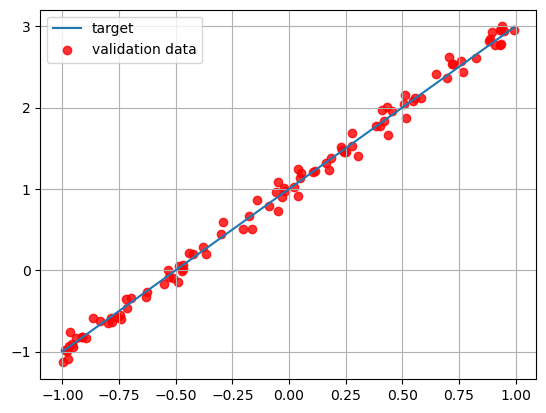

In [399]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', alpha=0.8, label='validation data')
plt.legend()
plt.grid(True)
plt.show()

Tramite il framework di Deep Learning *Keras*, costruisco un modello di rete neurale con un neurone soltanto, sufficiente per svolgere una regressione lineare (un modello più complesso non porterebbe a miglioramenti significativi e, al contrario, aumenterebbe il rischio di overfitting). Come ottimizzatore ho scelto lo stochastic gradient descent (SGD), mentre come loss e come metrica l'errore quadratico medio (MSE).

In [401]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Ora addestro la rete utilizzando i dati di training. Questi sono suddivisi in sottogruppi da $32$ elementi ciascuno, che vengono riorganizzati prima di ogni nuova epoca. L'allenamento procede per un totale di $30$ epoche, durante le quali i parametri della rete vengono ottimizzati in modo da minimizzare la loss function.

In [403]:
# fit the model using training dataset
# over 30 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9888 - mse: 3.9888 - val_loss: 2.8104 - val_mse: 2.8104
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1423 - mse: 2.1423 - val_loss: 1.7429 - val_mse: 1.7429
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3506 - mse: 1.3506 - val_loss: 1.1168 - val_mse: 1.1168
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8638 - mse: 0.8638 - val_loss: 0.7272 - val_mse: 0.7272
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5722 - mse: 0.5722 - val_loss: 0.4743 - val_mse: 0.4743
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3643 - mse: 0.3643 - val_loss: 0.3129 - val_mse: 0.3129
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2379 - mse: 0.2379 - val_loss: 0.2084 - val_mse: 0.2084
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1675 - mse: 0.1675 - val_loss: 0.1399 - val_mse: 0.1399
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1040 - mse: 

In [404]:
# return weights and biases
model.get_weights()

[array([[1.9961493]], dtype=float32), array([1.0015465], dtype=float32)]

Infine, valuto la performance del modello sui dati di validazione, faccio un confronto con la curva esatta, rappresento graficamente l'andamento della loss function (per entrambi i set di dati) in funzione del numero di epoche e genero predizioni a partire da nuovi valori di $x$.

In [406]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mse: 0.0076 

Test loss: 0.00829158816486597
Test accuracy: 0.00829158816486597


In [407]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1879e-05 - mse: 1.1879e-05 

Test loss: 8.608722055214457e-06
Test accuracy: 8.608722055214457e-06


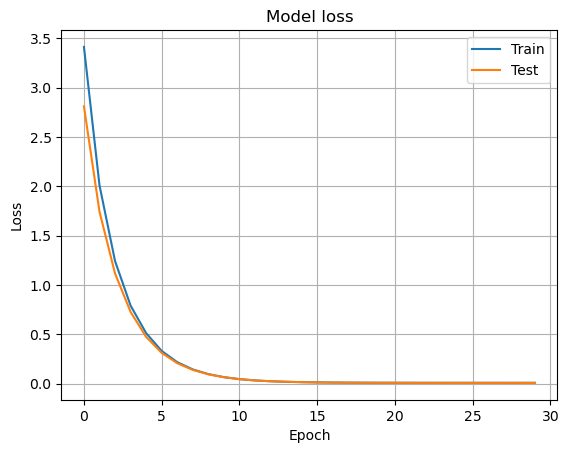

In [408]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


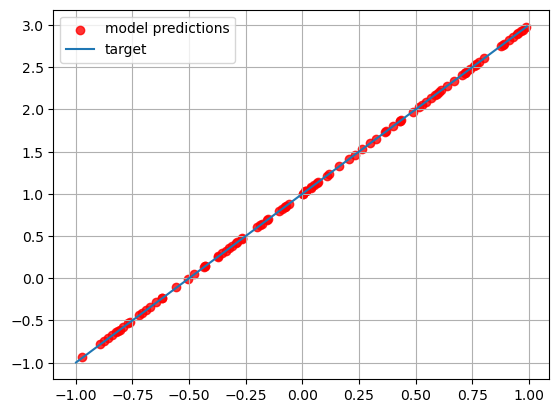

In [409]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='r', alpha=0.8, label='model predictions')
plt.plot(x_valid, y_target, label='target')
plt.legend()
plt.grid(True)
plt.show()

Facendo diverse prove, modificando i valori di $N_{\mathrm{epochs}}$, $N_{\mathrm{train}}$ e $\sigma$, ho notato che:
- come mi aspettavo, le predizioni peggiorano all'aumentare di $\sigma$: maggiore è il rumore, infatti, più difficile è per la rete approssimare la funzione $f(x)$ sottostante.
- aumentando il numero di epoche, i risultati non cambiano in modo significativo: la loss function tende a stabilizzarsi abbastanza rapidamente.
- in generale il fit migliora aumentando il numero di dati di training. Oltre una certa soglia (circa $1000$), però, la loss function non diminuisce più sensibilmente.

### <font color="blue"> Esercizio 11.2

#### Obiettivo:
Eseguire il fit per la funzione polinomiale di terzo grado $f(x)=4-3x-2x^2+3x^3$ con $x \in [-1,1]$, scegliendo adeguatamente: numero di layer, numero di neuroni in ciascun layer, funzione di attivazione, ottimizzatore e loss function.

Essendo il problema più complicato rispetto al caso precedente, per ottenere un risultato soddisfacente, ho dovuto modificare la struttura della rete neurale e ampliare i dataset di training e di validazione, cercando di evitare l'overfitting. In particolare, ho creato un modello con tre layer di neuroni: il primo, che riceve l'input monodimensionale, ne contiene $32$, il secondo $16$ e l'ultimo soltanto uno di output. Come funzione di attivazione ho scelto di utilizzare la ReLU (Rectified Linear Unit), come ottimizzatore lo stochastic gradient descent (SGD), mentre come loss function e come metrica l'errore quadratico medio (MSE). Ho usato $10000$ dati per allenare la rete e $1000$ per testarne l'efficacia. La deviazione standard del rumore e il numero di epoche sono gli stessi dell'esercizio precedente ($\sigma=0.1$ e $N_{\mathrm{epochs}}=30$).

In [429]:
import numpy as np

# parametri della funzione
a = 3
b = -2
c = -3
d = 4

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 1000)
x_valid.sort()
y_target = d + c * x_valid + b * (x_valid)**2 + a * (x_valid)**3 # ideal (target) function

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(d + c * x_train + b * (x_train)**2 + a * (x_train)**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(d + c * x_valid + b * (x_valid)**2 + a * (x_valid)**3, sigma)

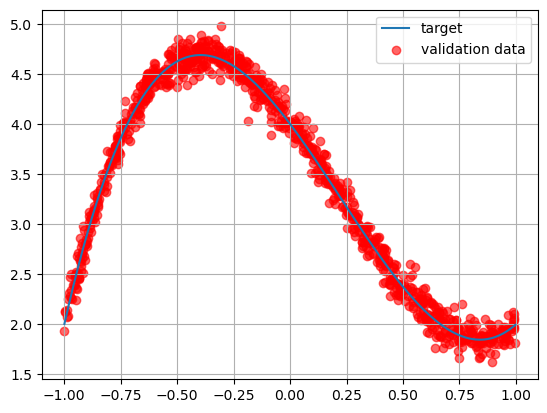

In [458]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', alpha=0.6, label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [433]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = Sequential()
model.add(Dense(32, input_shape=(1,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 609 (2.38 KB)

 Trainable params: 609 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

In [435]:
# fit the model using training dataset
# over 30 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.1122 - mse: 2.1122 - val_loss: 0.1943 - val_mse: 0.1943
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1439 - mse: 0.1439 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0539 - mse: 0.0539 - val_loss: 0.0353 - val_mse: 0.0353
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0339 - mse: 0.0339 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 9/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - lo

In [437]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0107 - mse: 0.0107 

Test loss: 0.01140811201184988
Test accuracy: 0.01140811201184988


In [439]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - mse: 0.0010        

Test loss: 0.0015179087640717626
Test accuracy: 0.0015179087640717626


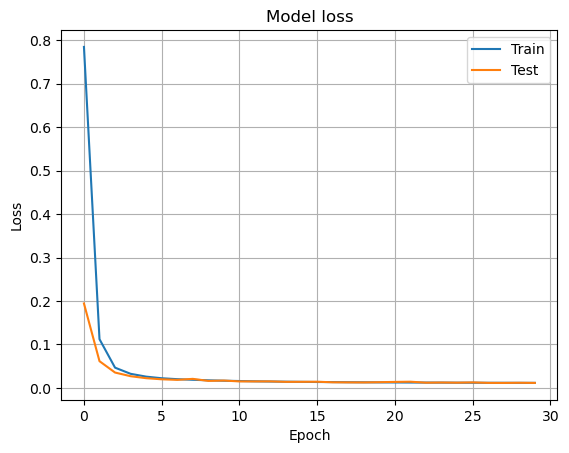

In [441]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


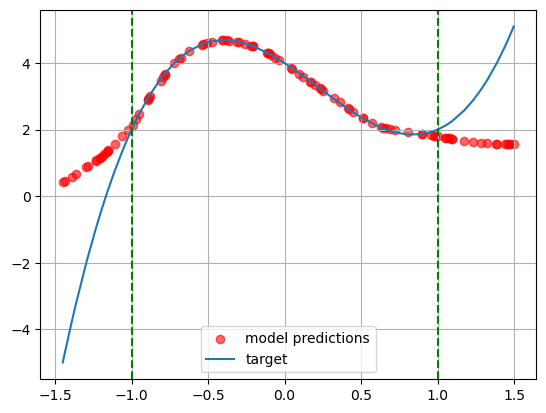

In [460]:
x_predicted = np.random.uniform(-1.5, 1.5, 100)
x_predicted.sort()
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='r', alpha=0.6, label='model predictions')
plt.plot(x_predicted, d + c * x_predicted + b * (x_predicted)**2 + a * (x_predicted)**3, label='target')
plt.axvline(1, color = 'green', linestyle = '--')
plt.axvline(-1, color = 'green', linestyle = '--')
plt.legend()
plt.grid(True)
plt.show()

Le due loss function hanno un andamento abbastanza simile: dopo una decrescita iniziale piuttosto veloce, si stabilizzano attorno a circa lo stesso valore. Non sono presenti, pertanto, segnali di overfitting.

L'ultimo grafico, infine, evidenzia come il modello abbia una buona capacità di generalizzare all'interno dell'intervallo di training (ad eccezione di valori molto vicini a $1$) e come invece le prestazioni peggiorino notevolmente quando chiediamo di fare predizioni su dati che non appartengono a tale intervallo. Si tratta di un comportamento tipico delle reti neurali: esse sono in grado di approssimare bene la funzione soltanto nell'intervallo in cui sono state addestrate.

### <font color="blue"> Esercizio 11.3

#### Obiettivo:
Eseguire il fit per la funzione trigonometrica 2D $f(x,y)=\sin(x^2+y^2)$ nel range $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

Ho mantenuto la stessa struttura della rete neurale dell'esercizio precedente, ma chiaramente questa volta l'input è bidimensionale. Anche funzione di attivazione, ottimizzatore, loss function e metrica sono uguali. Ho utilizzato $15000$ dati per allenare il modello e $1500$ per testarne l'efficacia. Inoltre, ho aumentato il numero di epoche a $50$.

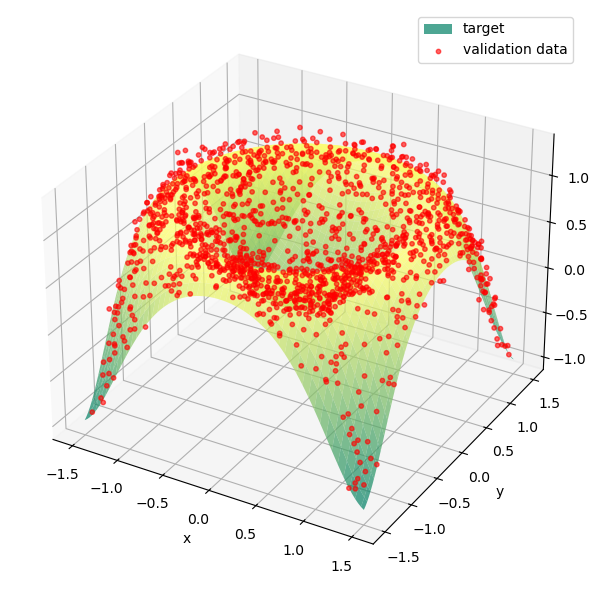

In [506]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, 15000)
y_train = np.random.uniform(-1.5, 1.5, 15000)
x_valid = np.random.uniform(-1.5, 1.5, 1500)
y_valid = np.random.uniform(-1.5, 1.5, 1500)
z_target = np.sin(x_valid**2 + y_valid**2) # ideal (target) function

sigma = 0.1 # noise standard deviation
z_train = np.random.normal(np.sin(x_train**2 + y_train**2), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(np.sin(x_valid**2 + y_valid**2), sigma)

# plot validation and target dataset
import matplotlib.pyplot as plt

x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X**2 + Y**2)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='summer', alpha=0.7, label='target')
ax.scatter(x_valid, y_valid, z_valid, color="red", s=10, alpha=0.6, label="validation data")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()
plt.tight_layout()

plt.show()

In [522]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = Sequential()
model.add(Dense(32, input_shape=(2,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [524]:
xy_train = np.column_stack((x_train, y_train))
xy_valid = np.column_stack((x_valid, y_valid))

# fit the model using training dataset
# over 50 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=xy_train, y=z_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(xy_valid, z_valid))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2134 - mse: 0.2134 - val_loss: 0.1445 - val_mse: 0.1445
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1477 - mse: 0.1477 - val_loss: 0.1334 - val_mse: 0.1334
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1379 - mse: 0.1379 - val_loss: 0.1243 - val_mse: 0.1243
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1308 - mse: 0.1308 - val_loss: 0.1175 - val_mse: 0.1175
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1196 - mse: 0.1196 - val_loss: 0.1076 - val_mse: 0.1076
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1103 - mse: 0.1103 - val_loss: 0.0994 - val_mse: 0.0994
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1041 - mse: 0.1041 - val_loss: 0.0899 - val_mse: 0.0899
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0936 - mse: 0.0936 - val_loss: 0.0806 - val_mse: 0.0806
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - lo

In [526]:
# evaluate model
score = model.evaluate(xy_valid, z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mse: 0.0102 

Test loss: 0.010407093912363052
Test accuracy: 0.010407093912363052


In [528]:
# evaluate model with the exact curve
score = model.evaluate(xy_valid, z_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mse: 0.0012 

Test loss: 0.001117417123168707
Test accuracy: 0.001117417123168707


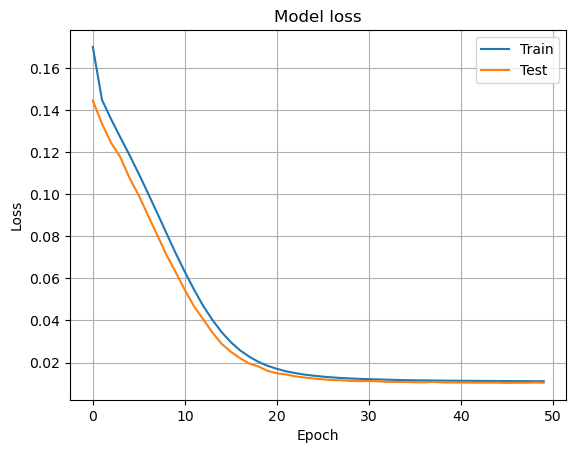

In [530]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


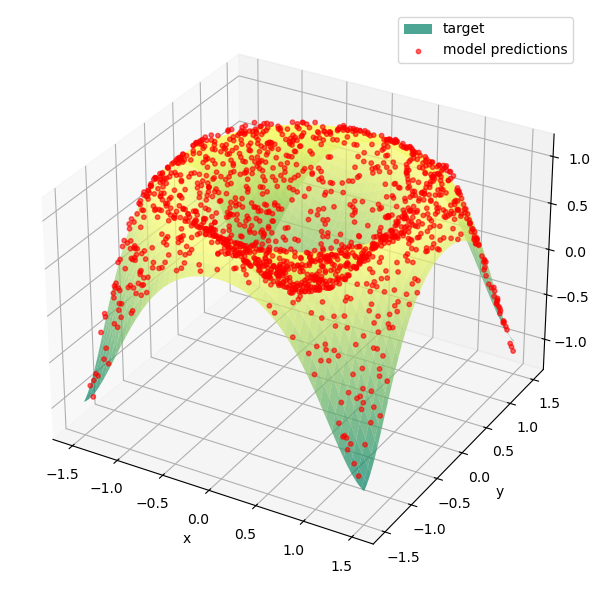

In [532]:
xy_predicted = np.random.uniform(-1.5, 1.5, size=(1500, 2))
z_predicted = model.predict(xy_predicted)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='summer', alpha=0.7, label='target')
ax.scatter(xy_predicted[:,0], xy_predicted[:,1], z_predicted.flatten(), color="red", s=10, alpha=0.6, label="model predictions")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()
plt.tight_layout()

plt.show()

Il fit ottenuto risulta soddisfacente.